<a href="https://colab.research.google.com/github/PaulAyeni/Campaign_analysis/blob/main/Chi_square_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AB Test Case study
## Context

This Case study imagines a Martketing company want to run successful campaigns, but the market is complex and several options can work. The company is currently conducting an A/B experiment where Public Service Announcements (PSAs) serve as the control group, and ads serve as the experiment group. The majority of participants will be shown ads. The experiment will ensure that the content (PSAs or ads) is displayed in the exact same size and location.

my task it to analise

- if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

i also want to assess

- if campaign be successful?

- If the campaign was successful, how much of that success could be attributed to the ads?

the Industry standard converstion rate is 4%.


The data science pipeline is as follows:



1.   Import libaries
2.   Data cleaning
3.   EDA
4.  Formulate and test hypothesis
5. analyse the results and provide reccomendation




# 1. Importing Libaries

In [ ]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [ ]:
#reading the data
df = pd.read_csv("marketing_AB.csv")

In [ ]:
#seeing the data in a data frame
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


# 2. Data Cleaning

In [ ]:
#checking if there are duplicates in users
df.duplicated(subset = 'user id').sum()

0

In [ ]:
#Drop unwanted columns
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

In [ ]:
#checking what columns we have left
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [ ]:
#checking to see data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


we have 588,100 observations most of the data consists of categorical data the only true numerical colunm is total ads

In [ ]:
#checking if the categorical variables have appropriate number of levels
df_cat = df[['test group', 'converted',	'most ads day',	'most ads hour']]
df_cat.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


In [ ]:
#checking to see each categorical feature unique value
for i in df_cat.columns:
    print(i.lower(), ":", df_cat[i].unique())

test group : ['ad' 'psa']
converted : [False  True]
most ads day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]



At the Data cleaning stage we have

- Checked for duplicates in the data
- dropped the indexing number and user id
- checked to see the data types of each feature

# 3. EDA (Univariate analysis)


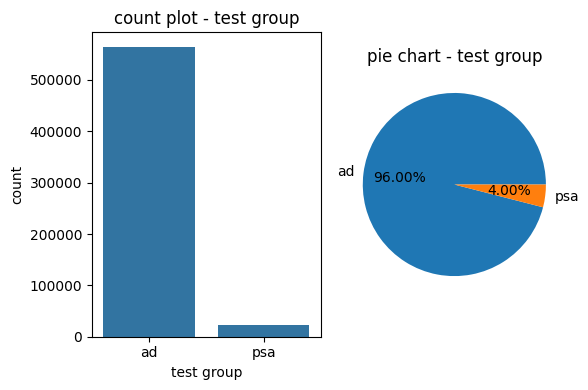

In [ ]:
variable = 'test group'

plt.figure(figsize = (6, 4))
#count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'count plot - {variable}')

#pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels =counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

#Adjust layout
plt.tight_layout()

#show plots
plt.show()

this shows that most people (96%) were shown ads whilst the rest were shown a public service announcement


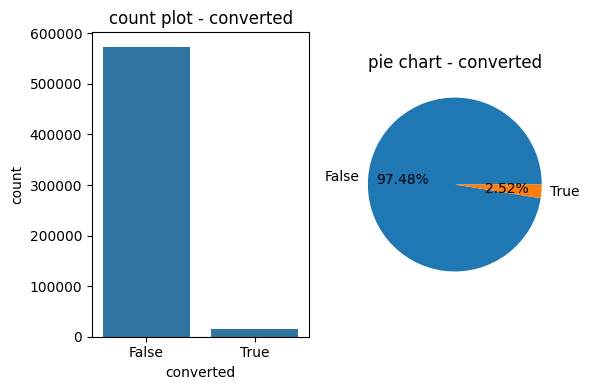

In [ ]:
#same code but for converted
variable = 'converted'

plt.figure(figsize = (6, 4))
#count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'count plot - {variable}')

#pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels =counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

#Adjust layout
plt.tight_layout()

#show plots
plt.show()

from this we can see that very only 2.5% actually purchased

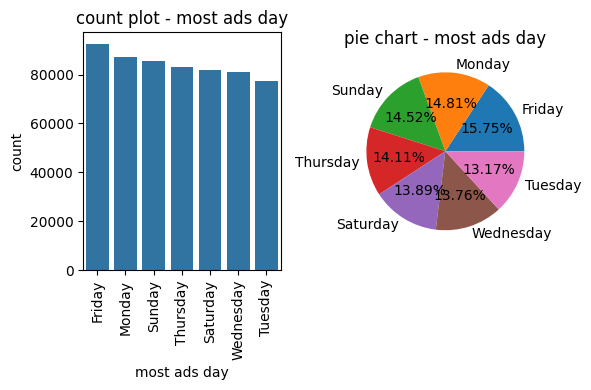

In [ ]:
#most days
variable = 'most ads day'

plt.figure(figsize = (6, 4))
#count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order = df_cat ['most ads day'].value_counts().index)
plt.title(f'count plot - {variable}')
plt.xticks(rotation = 90)

#pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels =counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

#Adjust layout
plt.tight_layout()

#show plots
plt.show()

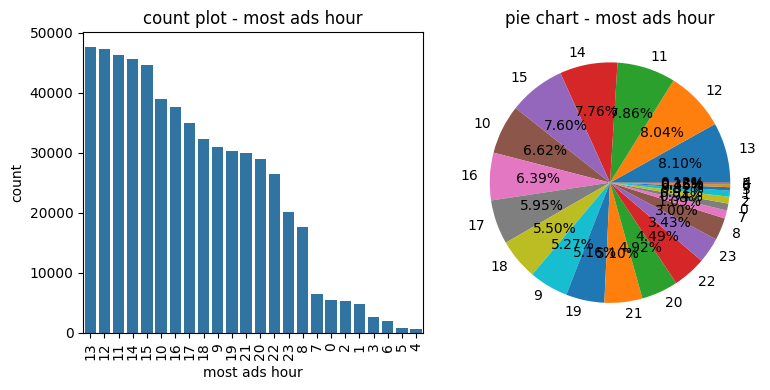

In [ ]:
#most ads hour
variable = 'most ads hour'

plt.figure(figsize = (8, 4))
#count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order = df_cat ['most ads hour'].value_counts().index)
plt.title(f'count plot - {variable}')
plt.xticks(rotation = 90)

#pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels =counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

#Adjust layout
plt.tight_layout()

#show plots
plt.show()

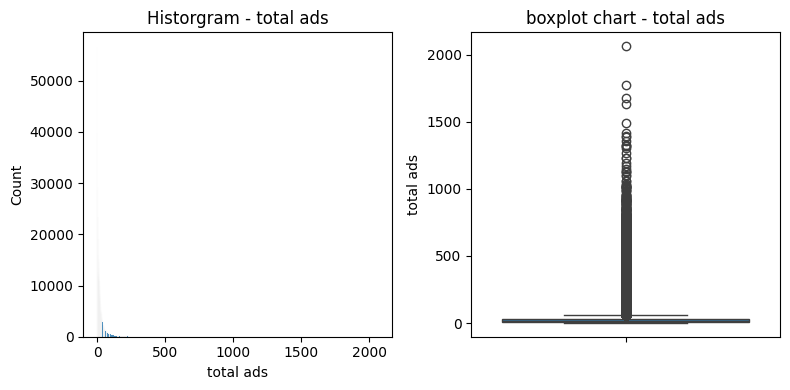

In [ ]:
#most total ads
variable = 'total ads'

plt.figure(figsize = (8, 4))
#count plot
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df)
plt.title(f'Historgram - {variable}')


#box plot
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data = df)
plt.title(f'boxplot chart - {variable}')

#Adjust layout
plt.tight_layout()

#show plots
plt.show()

In [ ]:
#looking at descriptive stats due to historgram being off
df['total ads'].describe()

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


when looking at the descriptive stats of the data we can see a wide gap between the min and max, or even from the 75th percentile to the max.

Hence we should only use the data up to the 75th percent. conversly you could just use calculate the z score and only inslude data which is 2 stand deviation from the mean ( keeping 95% of the data) but in this case study i am only going to use the first technique

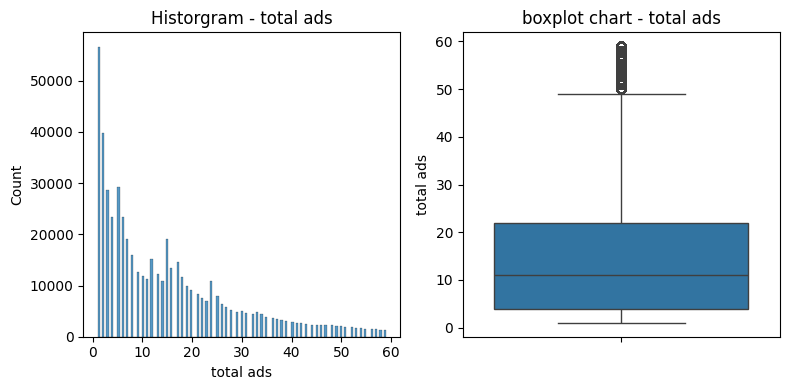

In [ ]:
variable = 'total ads'

plt.figure(figsize = (8, 4))
#count plot
plt.subplot(1, 2, 1)
#filtering the data to see only the 75th perecenttile
sns.histplot(x=variable, data=df[df['total ads'] <60] )
plt.title(f'Historgram - {variable}')


#box plot
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data=df[df['total ads'] <60] )
plt.title(f'boxplot chart - {variable}')

#Adjust layout
plt.tight_layout()

#show plots
plt.show()

For the univariate analysis, i have observed the following:

- **Ad Exposure**: 96% of participants were shown ads, while only 4% were shown PSAs.



- **Conversion Rate**: The overall conversion rate was 2.5%.
- **Ad Display Duration**: The number of days ads were shown was relatively evenly distributed, with only about a 2% difference between the most and least active days.
- **Ad Timing**: Most ads were displayed from early afternoon until midnight, with nearly 50% of ads shown between 10 AM and 4 PM.
- **Ad Frequency**: The data for total ads shown was highly skewed, ranging from a minimum of 1 to a maximum of 2065 ads per person. This resulted in a higher standard deviation than the mean. To address this, we focused on data where the total ads shown were fewer than 60.




# EDA (Bivariate analysis)

In [ ]:
#lOOKING at the features again
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:
#cross tab analysis. TEST GROUP
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


From this we can see that people who have seen the ad have a 2.5% converstion rate, compared to public services annoucment (1%)

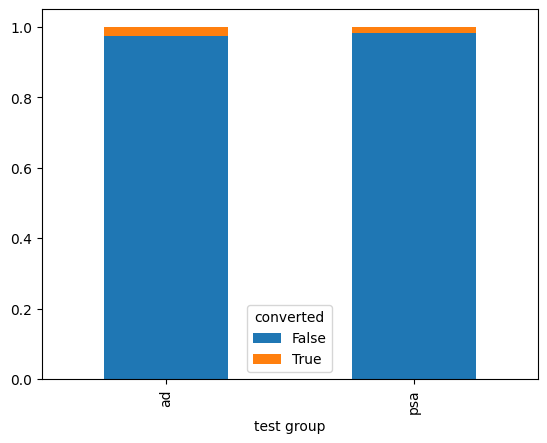

In [ ]:
#seeing the results visualised
ct_conversion_test_group.plot.bar(stacked = True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


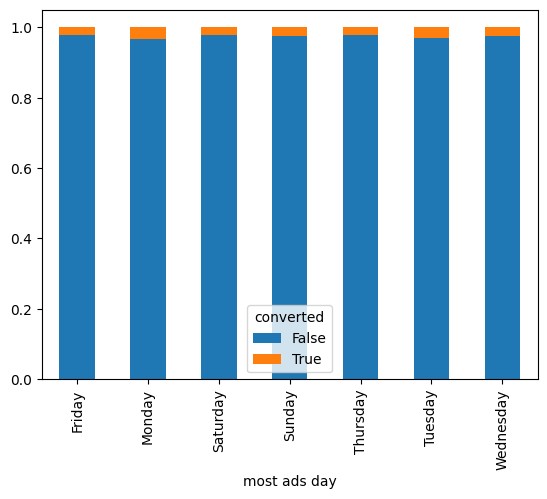

In [ ]:
#Crosstab on most ads day
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
#SORTING IT BY THE CONVERSTION RATE
print(ct_conversion_day.sort_values(by = True, ascending = False))
ct_conversion_day.plot.bar(stacked = True);

We can observe that Monday and Tuesday have higher conversion rates compared to other days, with Monday being the highest and Saturday the lowest. While the gap between these days is just 1%, this seemingly small difference could translate into significant revenue, particularly if targeted at a large customer base through effective advertising.

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


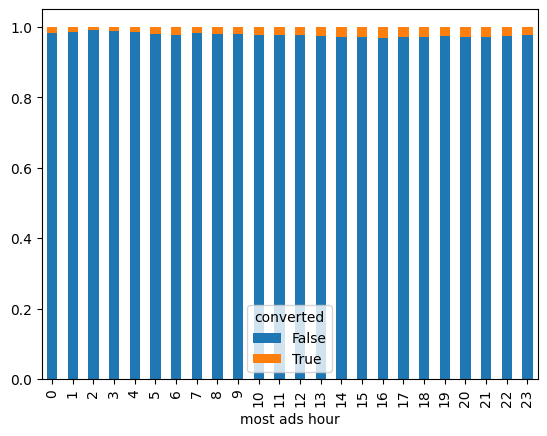

In [ ]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
#SORTING IT BY THE CONVERSTION RATE
print(ct_conversion_hour.sort_values(by = True, ascending = False))
ct_conversion_hour.plot.bar(stacked = True);


We can also see that ads shown in the afternoon have a higher conversion rate compared to those displayed at night, likely due to customers being asleep during nighttime hours.

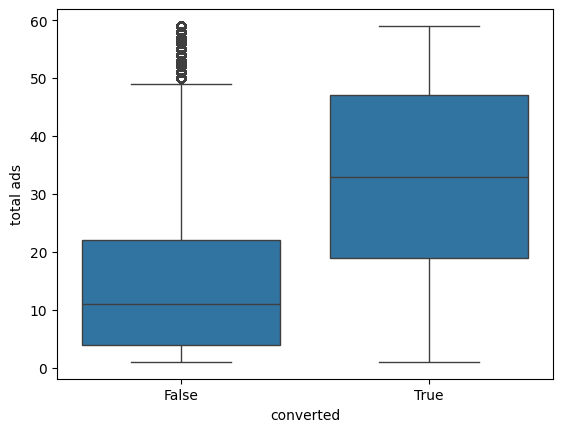

In [ ]:
sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads'] < 60]);

Insights from bivariate analysis

- **Conversion Uplift**: Ads resulted in a 0.8% higher conversion rate compared to PSAs.
- **Day of the Week**: The highest conversion rates occurred on Monday and Tuesday, around 3%, while other days ranged from 2.1% to 2.5%. Interestingly, most ads were shown on Friday, followed by Monday, with Tuesday having the fewest ads shown.
- **Time of Day**: The top five hours for conversions were 4 PM (3%), 8 PM (2.9%), 3 PM (2.9%), 9 PM (2.8%), and 5 PM (2.8%). This does not correlate with the hours when most ads were shown, as 50% of ads were displayed between 10 AM and 4 PM.
- **Ad Exposure**: On average, users who made a purchase saw about 33 ads before converting.

# **statistical test**



**Hypothesis**
- **Null Hypothesis** (H_0): There is no significant difference in the conversion rates between users who see ads and those who see PSAs.
- **Alternative Hypothesis** (H_1): There is a significant difference in the conversion rates between users who see ads and those who see PSAs.

In [ ]:
#Importing chisquare libary and formulating hypothesis to 95% CI
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        # Create a contingency table ( cross tab)
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

    #performing chi-sqaured test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    #Displaying the results
    print(f"\nChi-squared test for {variable} vs. converted:")
    print(f"\nChi-squared value for {chi2}")
    print(f"p-value: {p}")

    #Check for significance
    if p < alpha:
        print(f"The difference in conversion rates across {variable} is statistically signicicant.")
    else:
        print(f"The is no significant differences in conversion rates across {variable} is statistically signicicant.")



Chi-squared test for test group vs. converted:

Chi-squared value for 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically signicicant.

Chi-squared test for converted vs. converted:

Chi-squared value for 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across converted is statistically signicicant.

Chi-squared test for most ads day vs. converted:

Chi-squared value for 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically signicicant.

Chi-squared test for most ads hour vs. converted:

Chi-squared value for 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically signicicant.


**we reject the null an accept the alternative hypothesis that ads are more successful than PSa**

# **Recomendations**

**The current overall conversion rate for the campaign is 2.5%. If only ads were used, the conversion rate would be around 3%, which is still below the industry standard of 4%.**

Here are some suggestions to achieve a higher conversion rate:

- **Focus on Ads**: Use ads exclusively, as they provide a better return on investment compared to PSAs.
- **Optimal Timing**: Display the majority of ads from 2 PM to midnight, as this timing has shown statistical significance.
- **Best Days**: Show most ads on Mondays and Tuesdays, as these days have the highest conversion rates compared to other days.
- **Ad Exposure Limit**: Limit ad exposure to around 30 ads per person.

**I believe implementing these steps will increase the likelihood of reaching and exceeding the 4% conversion rate.**



